In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#**PCOS Detection**

In [ ]:
#Imports necessary libraries
import os #Provides a way to interact with the operating system, including file and directory manipulation.
import cv2 #(OpenCV): Used for image processing tasks.
from tqdm import tqdm # A library for displaying progress bars during iterations.

datadir = r'/content/drive/MyDrive/dataset'  # Path to directory with class subdirectories holding the image files
bad_img_list = []  #A list that will store the paths of defective images.
classes = sorted(os.listdir(datadir))  #A list of classes within the specified data directory.

#Defines a function is_infected_image
def is_infected_image(image_path): #Takes the path of an image file as an argument.
    try:
        index = image_path.rfind('.')  # Find the rightmost . in image_path
        ext = image_path[index + 1:].lower()  # Get the file's extension and convert it to lowercase
        good_ext = ['jpg', 'jpeg', 'bmp', 'png']  # List of allowable extensions for image_dataset_from_directory
        if ext not in good_ext:
            return True  # Return True if the extension is not allowed
        img = cv2.imread(image_path)  # Read in the image
        shape = img.shape  # Get the image shape (height, width) or (height, width, channels)
        count = len(shape)
        if count == 2:  # If shape is (width, height), the image is single-channel
            channels = 1
        else:
            channels = shape[2]  # Shape is (width, height, channels)
        if channels == 2:
            return True  # Return True if the image has 2 channels
    except:
        return True  # Return True if any other exception occurs
    return False  # Return False if the image is not infected

# Iterate through each class and its images
for klass in classes:
    classpath = os.path.join(datadir, klass)
    flist = sorted(os.listdir(classpath))  # List of files in the current class

    for f in tqdm(flist, ncols=100, unit='files', colour='blue', desc=klass):
        fpath = os.path.join(classpath, f)  # Path to the image file

        if is_infected_image(fpath):
            # Append the path to the list of bad_img_list
            bad_img_list.append(fpath)
            os.remove(fpath)  # Remove the infected image file

if len(bad_img_list) > 0:
    print('Below is a list of defective image filepaths that were removed:')
    for f in bad_img_list:
        print(f)

pcos: 100%|███████████████████████████████████████████████████| 811/811 [00:03<00:00, 252.48files/s]

Below is a list of defective image filepaths that were removed:
/content/drive/MyDrive/dataset/normal/OIP (1).jpg
/content/drive/MyDrive/dataset/normal/WhatsApp Image 2022-04-01 at 3.35.25 PM.jpeg
/content/drive/MyDrive/dataset/normal/WhatsApp Image 2022-04-01 at 3.39.07 PM.jpeg
/content/drive/MyDrive/dataset/normal/img_0_7.jpg
/content/drive/MyDrive/dataset/pcos/OIP.jpg
/content/drive/MyDrive/dataset/pcos/R.jpg
/content/drive/MyDrive/dataset/pcos/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
/content/drive/MyDrive/dataset/pcos/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
/content/drive/MyDrive/dataset/pcos/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
/content/drive/MyDrive/dataset/pcos/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg


###Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt
from IPython.display import HTML

###Set all the Constants

In [ ]:
BATCH_SIZE = 32 #standard batch size is 32
IMAGE_SIZE = 224  #image_size -> 224 * 224
CHANNELS=3
EPOCHS=15

###Import data into tensorflow dataset object

In [ ]:
#tf.keras.preprocessing.image_dataset_from_directory -> this call will load all the images into your tensor/dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset",
    seed=123,
    shuffle=True, #randomly suffle the images
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1987 files belonging to 2 classes.


In [ ]:
#to obtain class names that is folder names
class_names = dataset.class_names
class_names

['normal', 'pcos']

In [ ]:
#68 * 32 -> 2176 and last batch is not perfect. so, it is showing more files
len(dataset)

63

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape) #rgb -> 3 channels
    print(labels_batch.numpy()) #to convert tensor into numpy

(32, 224, 224, 3)
[0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1]


In [ ]:
#to print first image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])
#Each number in the matrix represents the intensity of a pixel at a specific location in the image.

tf.Tensor(
[[[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [15.346078  15.346078  15.346078 ]
  [25.928606  25.928606  25.928606 ]
  [26.327229  26.327229  26.327229 ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 5.261247   5.261247   5.261247 ]
  [26.878832  26.878832  26.878832 ]
  [38.964462  38.964462  38.964462 ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 0.         0.         0.       ]
  [22.02095   22.02095   22.02095  ]
  [35.50404   35.50404   35.50404  ]]

 ...

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 2.         2.         2.       ]
  [ 2.0892944  2.0892944  2.0892944]
  [ 1.         1.         1.       ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         

In [ ]:
#every number is btw 0 to 255
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())


[[[ 13.991076  17.991076  20.991076]
  [ 10.993303  14.993303  17.993303]
  [ 10.        14.        17.      ]
  ...
  [ 16.075893  19.075893  26.075893]
  [ 16.075893  19.075893  26.075893]
  [ 16.075893  19.075893  26.075893]]

 [[ 12.988839  16.988838  19.988838]
  [ 10.986607  14.986607  17.986607]
  [  9.993379  13.993379  16.993378]
  ...
  [ 50.10045   53.10045   60.10045 ]
  [ 50.10045   53.10045   60.10045 ]
  [ 50.10045   53.10045   60.10045 ]]

 [[ 11.950918  15.950918  18.950918]
  [  9.959896  13.959896  16.959896]
  [  8.988715  12.988715  15.988714]
  ...
  [ 64.95536   67.95536   74.95536 ]
  [ 64.95536   67.95536   74.95536 ]
  [ 64.95536   67.95536   74.95536 ]]

 ...

 [[158.       158.       158.      ]
  [158.       158.       158.      ]
  [158.       158.       158.      ]
  ...
  [158.       158.       158.      ]
  [158.       158.       158.      ]
  [158.       158.       158.      ]]

 [[158.       158.       158.      ]
  [158.       158.       158.      ]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(224, 224, 3)


###Visualize some of the images from our dataset

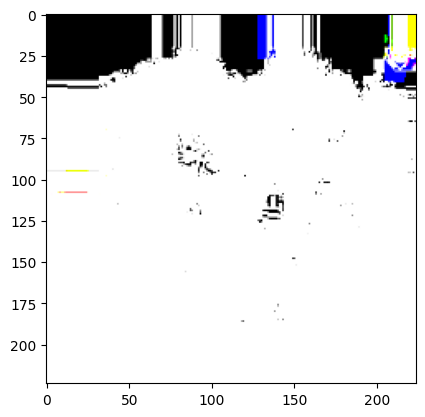

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy()) #imshow expects 3d array
  #it is in float
  #image_batch[0].numpy(): Converts the first image from a TensorFlow tensor to a NumPy array. The numpy() method is used to extract the numerical values from the TensorFlow tensor.

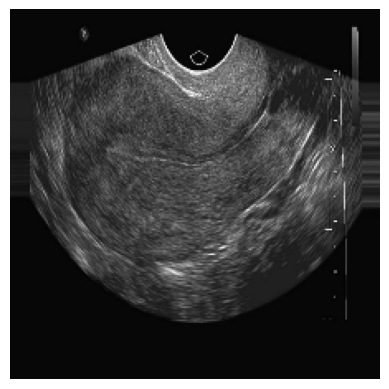

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.axis("off") #to hide axis
  #Converting to uint8 is a common practice when working with images because it ensures that the pixel values are within the expected range for color representation.

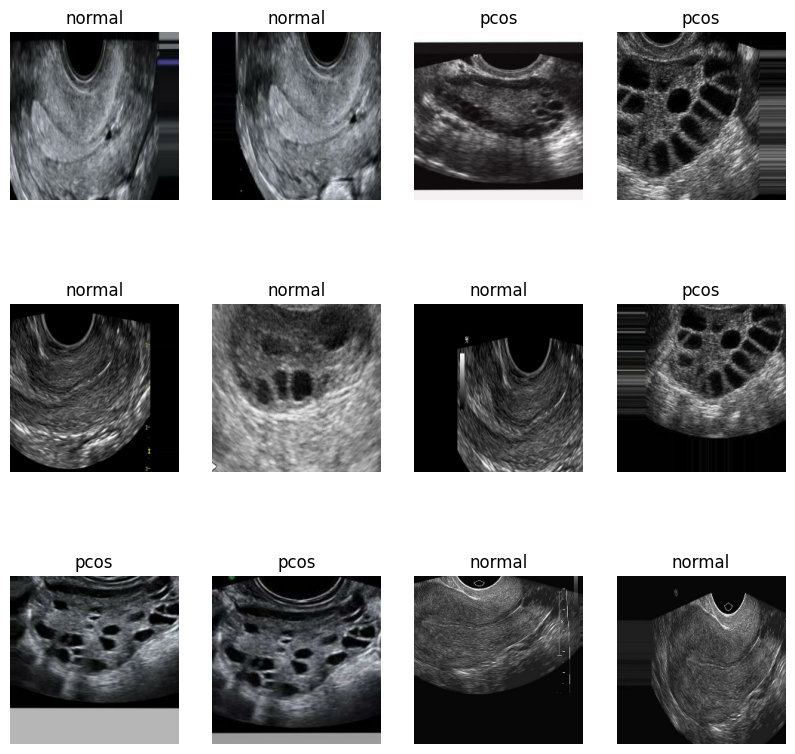

In [ ]:
plt.figure(figsize=(10, 10)) #to increase the area of image
for image_batch, labels_batch in dataset.take(1):
    for i in range(12): #to print 12 images
        ax = plt.subplot(3, 4, i + 1) #to make a matrix of 3 * 4
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]]) #to display label on image
        plt.axis("off")

###Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:

1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)

63

In [ ]:
#80% ==> training
#20% ==>  10% validation, 10% test
train_size = 0.8
len(dataset)*train_size
# 68 * 0.8 ==> 54

50.400000000000006

In [ ]:
train_ds = dataset.take(54) #take first 54 samples
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54) #skip first 54 samples
len(test_ds)

9

In [ ]:
val_size=0.1
len(dataset)*val_size

6.300000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

3

In [ ]:
#get_dataset_partitions_tf --> function name
#take tensorflow dataset, split_ratio and other

In [ ]:
#creating a nice looking python function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle: #shuffling before spiltting
        ds = ds.shuffle(shuffle_size, seed=12) #seed for predictability
        #if same seed everytime, we'll see same results

    train_size = int(train_split * ds_size) #to get int
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds #returning values

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

50

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

7

###Cache, Shuffle, and Prefetch the Dataset

In [ ]:
#tf.data.Dataset.prefetch(1)  -> 1 is how many batches i want to prefetch
#tf.data.Dataset.prefetch(AUTOTUNE)  -> we'll let tenserflow framework decide for itself ie. how many batches it wants to load in advance
#prefetch -> cpu and gpu can work in parallel -> to make optimal use of hardware resources
#tf.data.Dataset.cache() -> open, read, map and train for first epoch but for the second epoch, it will just train -> will keep the image
# in memory -> improve the performance of the pipeline

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

##Building the Model

###Creating a Layer for Resizing and Normalization
#####Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [ ]:
#pre-preocessing
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/224) #to get value between 0 and 1,
])

###Data Augmentation

#####Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential ([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
#tf.keras.Sequential -> helps to form a cluster of a layer that is linearly stacked into tf. keras. Model.

####Applying Data Augmentation to Train Dataset

In [ ]:
#Data Augmentation to address overfitting
#from existing training samples we try to generate new samples
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

###Model Architecture

#####We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.
**We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks.**

In [ ]:
#    To handle variety in digits we can use simple artificial neural network(ANN)
#    Disadvantages of using ANN for image classification -
#    1. Too much computa tion.
#    2. Treats local pixels same as pixels far apart.
#    3. Sensitive to location of an object in an image.

#    convolutional neural network or CNN :-

#    Filters are nothing but the feature detectors
#    Location invariant - It can detect eyes in any location of the image
#    ReLU helps with making the model nonlinear
#    Pooling layer is used to reduce the size

#    Merits of pooling -
#    - reduces dimensions and computation
#    - reduces overfitting as there are less parameters
#    - model is tolerant towards variations, distortions

#    Merits of CNN:-
#    - Connections sparsity reduces overfitting.
#    - Conv + Pooling gives location invariant feature dectection
#    - Parameter sharing

#    Merits of ReLU:-
#    - Introduces nonlinearity
#    - Speeds up training, faster to compute

#    CNN by itself doesn't take care of rotation and scale
#    - you need to have rotated, scaled samples in training dataset
#    - if you don't have such samples than use data augmentation methods to generate new rotated/
#     scaled samples from existing training samples

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

#     -> 32 layers, relu is fast to compute
#     softmax activation function will normalise the probability of classes
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()
#total parameters = total weight

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 111, 111, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 54, 54, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 52, 52, 64)         

###Compiling the Model

#####We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose=1,
    epochs=15,
)

Epoch 1/15
50/50 [==============================] - 182s 3s/step - loss: 0.6484 - accuracy: 0.6397 - val_loss: 0.2483 - val_accuracy: 0.8854
Epoch 2/15
50/50 [==============================] - 165s 3s/step - loss: 0.1429 - accuracy: 0.9510 - val_loss: 0.2889 - val_accuracy: 0.9427
Epoch 3/15
50/50 [==============================] - 160s 3s/step - loss: 0.0784 - accuracy: 0.9745 - val_loss: 0.4045 - val_accuracy: 0.9062
Epoch 4/15
50/50 [==============================] - 161s 3s/step - loss: 0.1308 - accuracy: 0.9574 - val_loss: 0.2739 - val_accuracy: 0.9323
Epoch 5/15
50/50 [==============================] - 161s 3s/step - loss: 0.0721 - accuracy: 0.9790 - val_loss: 0.1121 - val_accuracy: 0.9740
Epoch 6/15
50/50 [==============================] - 156s 3s/step - loss: 0.0573 - accuracy: 0.9847 - val_loss: 0.0827 - val_accuracy: 0.9740
Epoch 7/15
50/50 [==============================] - 161s 3s/step - loss: 0.0579 - accuracy: 0.9847 - val_loss: 0.1034 - val_accuracy: 0.9583
Epoch 8/15
50

In [ ]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 13s 753ms/step - loss: 0.0273 - accuracy: 0.9955


#####**You can see above that we get 99.00% accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [ ]:
scores  #Scores is just a list containing loss and accuracy value

[0.027324451133608818, 0.9955357313156128]

###Plotting the Accuracy and Loss Curves

In [ ]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 50}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

15

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6483917236328125,
 0.14289799332618713,
 0.07838878035545349,
 0.13084529340267181,
 0.07205546647310257]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

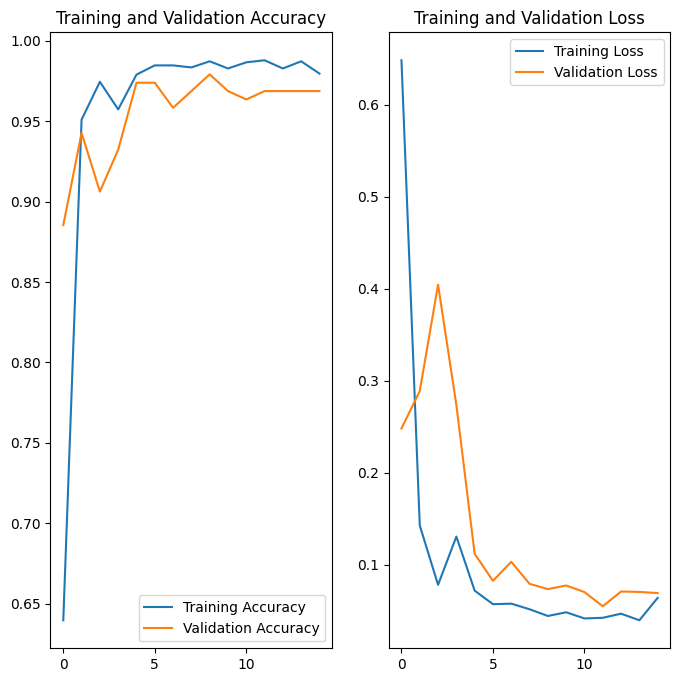

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Run prediction on a sample image

first image to predict
actual label: normal
1/1 [==============================] - 2s 2s/step
predicted label: normal


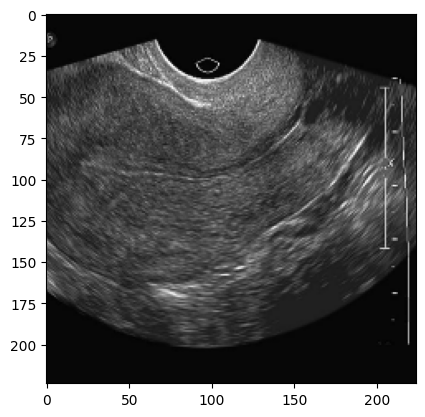

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

####Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 77ms/step


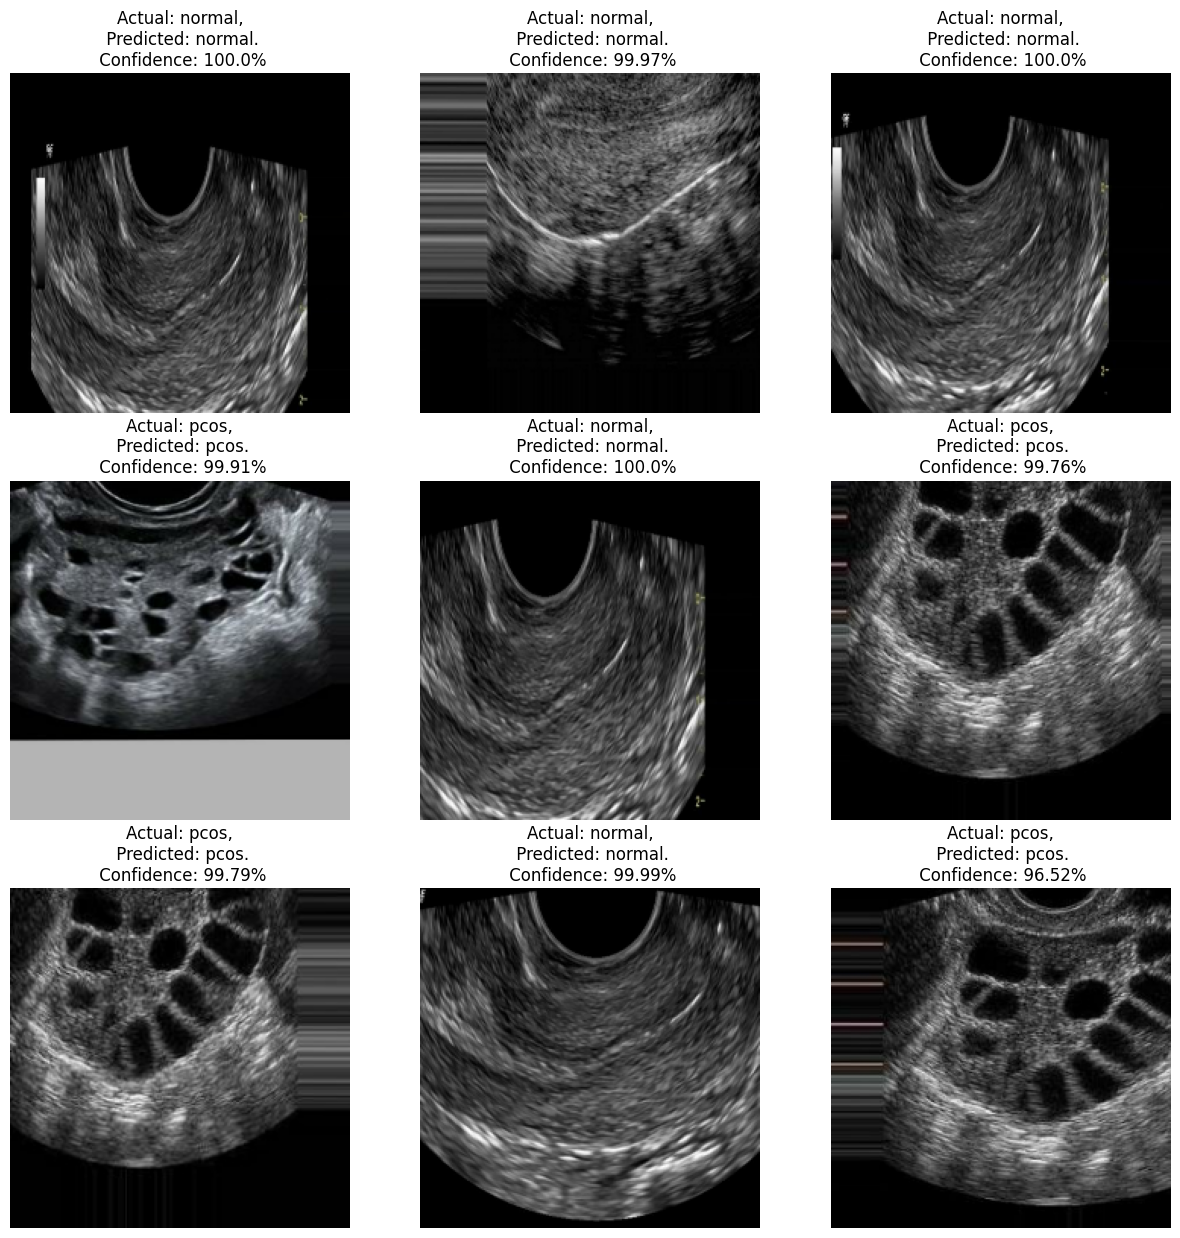

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")